In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
df= pd.read_csv("titanic_clean_data.csv")

In [20]:
df

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,Southampton,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,Cherbourg,2
2,1,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,Southampton,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,Southampton,2
4,0,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
884,0,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,Southampton,1
885,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,Southampton,1
886,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,23.4500,Southampton,4
887,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,Cherbourg,1


C:\Users\priyn\AppData\Local\Temp\ipykernel_20096\1234165909.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Survival Status', loc='upper right')


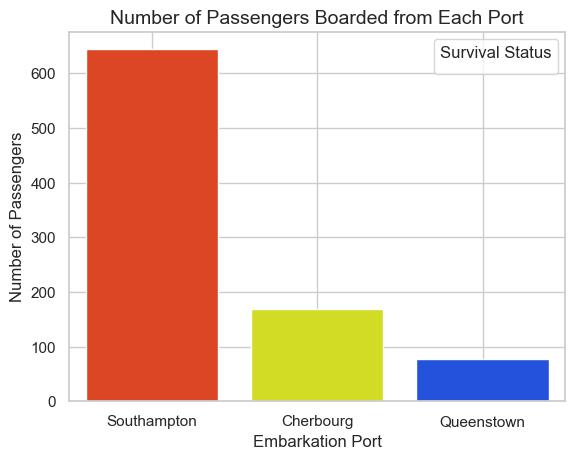

In [4]:
sns.set(style="whitegrid")

# Plot count of passengers from each embarkation port
sns.countplot(x='Embarked', data=df, hue='Embarked', palette=['#fa3207','#effa07','#0742fa'], legend=False)

# Add title and labels
plt.title('Number of Passengers Boarded from Each Port', fontsize=14)
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.legend(title='Survival Status', loc='upper right')

# Show plot
plt.show()

Text(0.5, 1.0, 'Family Size vs Survival')

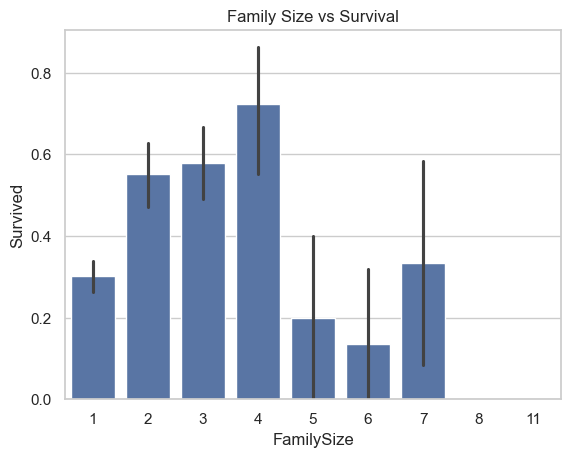

In [5]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Family Size vs Survival')


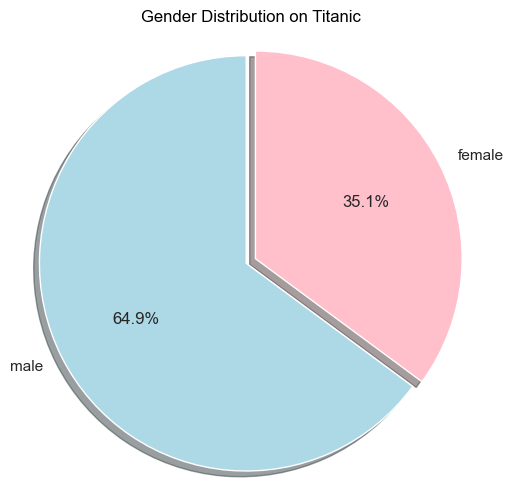

In [6]:
# Count number of males and females
gender_counts = df['Sex'].value_counts()

# Labels and colors
labels = ['male','female']
sizes = gender_counts.values
colors = ['lightblue', 'pink']  # male = lightblue, female = pink
explode = (0.05, 0)  # to slightly separate the first slice (usually 'male')


# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=explode, shadow=True)

plt.title('Gender Distribution on Titanic', color='black')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()


C:\Users\priyn\AppData\Local\Temp\ipykernel_20096\69141446.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_grouped = df.groupby([fare_bins, 'Survived'])['Fare'].mean().unstack()


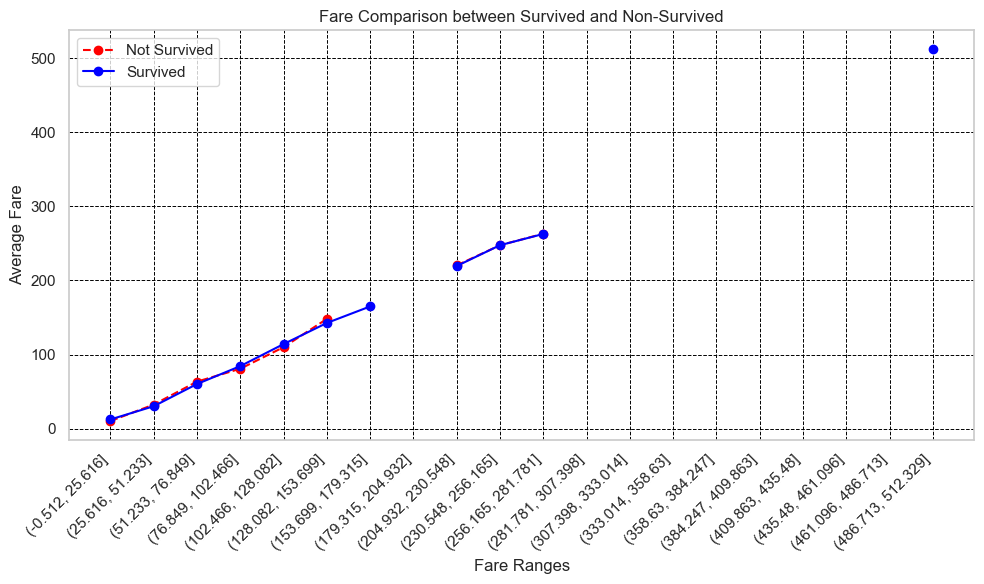

In [7]:
# Group data by Fare bins (optional for smoother line) or just sort it
fare_bins = pd.cut(df['Fare'], bins=20)
fare_grouped = df.groupby([fare_bins, 'Survived'])['Fare'].mean().unstack()

# Plotting
plt.figure(figsize=(10,6))

# Dashed line for non-survivors (Survived == 0)
plt.plot(fare_grouped.index.astype(str), fare_grouped[0], linestyle='--', marker='o', label='Not Survived', color='red')

# Solid line for survivors (Survived == 1)
plt.plot(fare_grouped.index.astype(str), fare_grouped[1], linestyle='-', marker='o', label='Survived', color='blue')

# Labels and legend
plt.xticks(rotation=45, ha='right')
plt.xlabel('Fare Ranges')
plt.ylabel('Average Fare')
plt.title('Fare Comparison between Survived and Non-Survived')
plt.legend()
plt.grid(True, color='black', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()



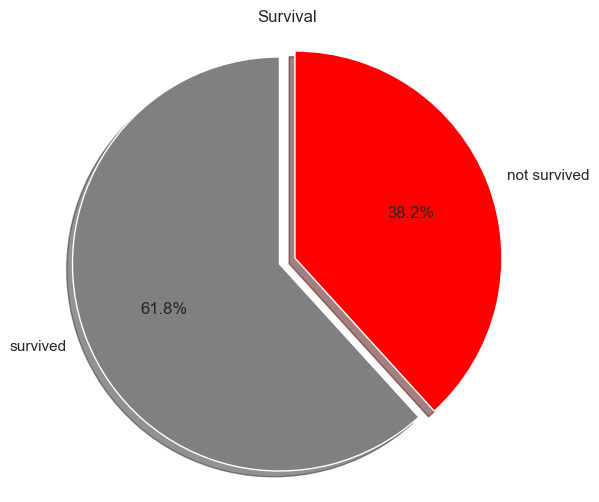

In [10]:
survival_counts = df['Survived'].value_counts()

# Labels and colors
labels = ['survived','not survived']
sizes = survival_counts.values
colors = ['grey', 'red'] 
explode = (0, 0.08)  


# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=explode, shadow=True)

plt.title('Survival')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()

C:\Users\priyn\AppData\Local\Temp\ipykernel_20096\1540837888.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=port_survival_rate, palette='Blues')


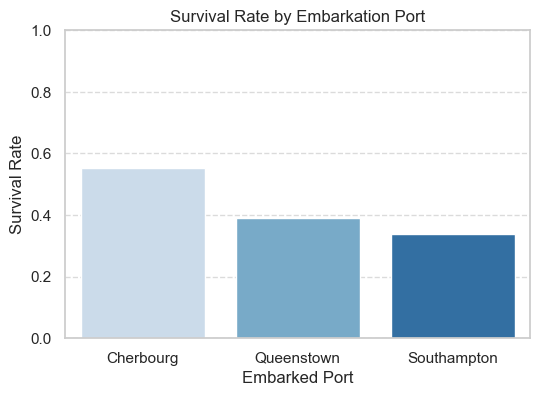

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate survival rate per port
port_survival_rate = df.groupby('Embarked')['Survived'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=port_survival_rate, palette='Blues')

plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked Port')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.show()


Text(0.5, 1.0, 'Survival by Sex')

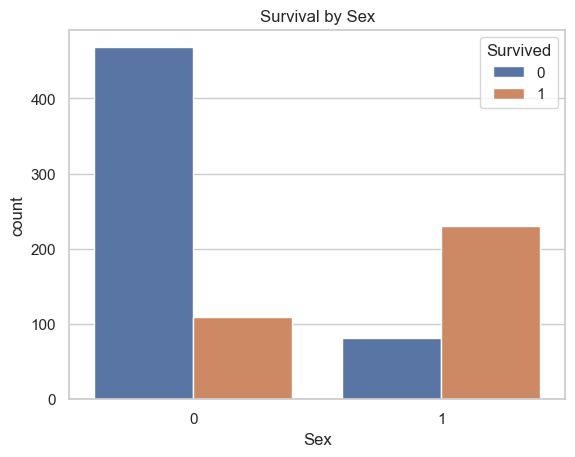

In [21]:

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')


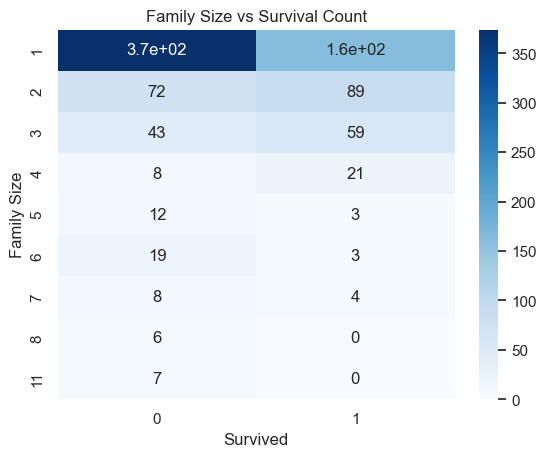

In [26]:



heat_data = pd.crosstab(df['FamilySize'], df['Survived'])

sns.heatmap(heat_data, annot=True, cmap='Blues')
plt.title('Family Size vs Survival Count')
plt.xlabel('Survived')
plt.ylabel('Family Size')
plt.show()
